<a href="https://colab.research.google.com/github/Sedighe-Raeisi/karate_club_with_Pytorch_GCNConv/blob/main/KarateClub_Pytorch_GCNConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_geometric
!pip install torch_sparse
!pip install torch_scatter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 407 kB 1.7 MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=8f8909782f9c9dd616e97f27719d15cb87699f8c67dd987d5c2ad2cd792ed907
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
Successfully built torch-geometric
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 180 kB/s 
  Created wheel for torch-sparse: filename=torch_sparse-0.6.14-cp37-cp37m-linux_x86_64.whl size=514667 sha256=9d2adefe73d61d4a82012d6771572235393a64b6c3c25167b630725859151a64
  Stored in directory: /root/.cache/pip/wheels/3c/aa/62/db0259eae2abce84f1ee2cf1c531bba683aab4bf79054172f8
Successfully built torch-sparse
Looking in indexes: https://pypi.org/simple, https://us-python.p

#Making the Model:

In [2]:
from torch.nn import Linear 
from torch_geometric.nn import GCNConv
from torch.nn import Module
import torch
import torch.nn.functional as F

To define the model we can use the instruction in the link: [link text](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html)

In [3]:
class model(Module):
  def __init__(self,inn_chan,hidden_chan,out_chan):
    super(model, self).__init__()
    self.GCN1=GCNConv(inn_chan,hidden_chan)
    self.GCN2=GCNConv(hidden_chan,out_chan)
    self.lin=torch.nn.Linear(out_chan,2)
  def forward(self,x,edge_index):
    h=self.GCN1(x,edge_index)
    h=torch.relu(h)
    h=self.GCN2(h,edge_index)
    h=torch.relu(h)
    h=self.lin(h)
    h=F.softmax(h,1)
    return h

#Defining the graph

⭐ You can download the data 





*   as a pair of nodes with a common edge from this link: [link text](https://networkrepository.com/soc-karate.php)
*   or as an adjacency matrix from this link: [link text](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary)

There is a very important difference between these two links, the weight of each edge does not exist in the first link.





##Prepairing the dataset. Here I show how to prepare the data to feed into the model. 

1.   In the first method, we manually make features of nodes,  X, and the edge-index  
2.   In the second method we use the NetworkX and we import it to PyTorch. We can either define the graph in Networkx manually or use the karate club dataset in this library. 

In [4]:
# !cp /content/karate_club_edge.txt -r /content/drive/MyDrive/MachineLearing/GNN

In [5]:
# we read the edge indexes as a pair of integer numbers from a text file. 
# node indexes began from 1, we change them in order to begin from 0 to better fit with the python indexing format.
f=open('/content/drive/MyDrive/MachineLearing/GNN/karate_club_edge.txt','r')
src_node=[]
dst_node=[]
for i in range(78):
  edge=f.readline()
  
  src=int(edge.split()[0])-1
  dst=int(edge.split()[1])-1
  src_node.append(src)
  dst_node.append(dst)

In [6]:
# src_node=[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 2, 3, 7, 13, 
#           17, 19, 21, 30, 3, 7, 8, 9, 13, 27, 28, 32, 7, 12, 13, 6, 10, 6, 10, 
#           16, 16, 30, 32, 33, 33, 33, 32, 33, 32, 33, 32, 33, 33, 32, 33, 32, 
#           33, 25, 27, 29, 32, 33, 25, 27, 31, 31, 29, 33, 33, 31, 33, 32, 33, 
#           32, 33, 32, 33, 33]




In [7]:
# dst_node=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 
#           1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 8, 8, 8, 9, 13,
#           14, 14, 15, 15, 18, 18, 19, 20, 20, 22, 22, 23, 23, 23, 23, 23, 24, 
#           24, 24, 25, 26, 26, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32]


Now we have the graph structure: 👇

In [8]:
edge_index = torch.tensor([src_node,
                           dst_node], dtype=torch.long)

Then we prepaire the featurs of each node. In an unaccepted and very simplified we use a constant integer for all nodes. 

In [9]:
a=[]
for i in range(35):
  a+=[[1]]
# a

In [10]:
len(a)

35

In [11]:
X = torch.tensor(a, dtype=torch.float)

In [12]:
X.size()

torch.Size([35, 1])

In [13]:
edge_index.size()

torch.Size([2, 78])

Here we introduce the labeled nodes and their corresponding nodes: 👇

In [14]:
labeled_nodes=torch.tensor([0, 33],dtype=int)
labels=torch.tensor([0, 1])

#Training

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
import numpy as np

##Training with a constant number as a node feature:

In [17]:
karate_model=model(1,5,2)

In [18]:
optimizer=torch.optim.Adam(karate_model.parameters())

In [19]:
all_pred=[]
for epochs in range(1000):
  
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epochs%100==0 :
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.5 , accuracy=0.5
epochs=100 , loss=-0.4999999701976776 , accuracy=0.5
epochs=200 , loss=-0.5 , accuracy=0.5
epochs=300 , loss=-0.5 , accuracy=0.5
epochs=400 , loss=-0.5 , accuracy=0.5
epochs=500 , loss=-0.5 , accuracy=0.5
epochs=600 , loss=-0.5 , accuracy=0.5
epochs=700 , loss=-0.5 , accuracy=0.5
epochs=800 , loss=-0.5000000596046448 , accuracy=0.5
epochs=900 , loss=-0.5 , accuracy=0.5


##Training with node degrees as a feature: 

*   In this part I use the degree of each node as a feature. 
*   In order to calculate the degree of each node, I defined the graph as a NetwokX graph. Then I use the command '.degree' to calculate the degree of each node. 



###Prepairing the data

In [20]:
import networkx as nx

In [21]:
g=[]
for i in range(len(src_node)):
  g.append((src_node[i],dst_node[i]))


In [22]:
G = nx.from_edgelist(g)

In [23]:
G.degree

DegreeView({1: 9, 0: 16, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 10: 3, 11: 1, 12: 2, 13: 5, 17: 2, 19: 3, 21: 2, 31: 6, 30: 4, 9: 2, 27: 4, 28: 3, 32: 12, 16: 2, 33: 17, 14: 2, 15: 2, 18: 2, 20: 2, 22: 2, 25: 3, 23: 5, 29: 4, 24: 3, 26: 2})

In [24]:
a=[]
for i in range(34):
  a+=[G.degree[i]]

###Training with node degrees as feature:

In [25]:
karate_model=model(1,5,2)

In [26]:
optimizer=torch.optim.Adam(karate_model.parameters())

In [27]:
all_pred=[]
for epochs in range(1000):
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.43951529264450073 , accuracy=0.5
epochs=100 , loss=-0.4851658046245575 , accuracy=0.5
epochs=200 , loss=-0.5032204985618591 , accuracy=0.5
epochs=300 , loss=-0.5181179046630859 , accuracy=0.5
epochs=400 , loss=-0.5414080023765564 , accuracy=0.5
epochs=500 , loss=-0.5741615295410156 , accuracy=0.5
epochs=600 , loss=-0.6150908470153809 , accuracy=0.5
epochs=700 , loss=-0.6597784757614136 , accuracy=1.0
epochs=800 , loss=-0.7046401500701904 , accuracy=1.0
epochs=900 , loss=-0.7474980354309082 , accuracy=1.0


##Training with embedding:

*   When we have no feature for nodes and we only have the structure of the graph, we can use the node embedding as feature input of the model. 
*   Then, during the training, both the model parameters and the parameters of node embeddings would be found. 



In [28]:
embed = torch.nn.Embedding(35, 5)
X=embed.weight
X=X.requires_grad_(True)

In [29]:
karate_model=model(5,5,2)

In [30]:
from itertools import chain 
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [31]:
all_pred=[]
all_loss=[]
for epochs in range(1000):
  pred_label=karate_model(X,edge_index)
  all_pred.append(pred_label)
  loss=F.nll_loss(pred_label[labeled_nodes],labels)
  pred_y=np.argmax(pred_label[labeled_nodes].detach().numpy(), axis=1)
  true_y=labels.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.4650305509567261 , accuracy=0.5
epochs=100 , loss=-0.5685721635818481 , accuracy=0.5
epochs=200 , loss=-0.7119004726409912 , accuracy=1.0
epochs=300 , loss=-0.8342750072479248 , accuracy=1.0
epochs=400 , loss=-0.8872225284576416 , accuracy=1.0
epochs=500 , loss=-0.9139349460601807 , accuracy=1.0
epochs=600 , loss=-0.9307501316070557 , accuracy=1.0
epochs=700 , loss=-0.9425444602966309 , accuracy=1.0
epochs=800 , loss=-0.9513797163963318 , accuracy=1.0
epochs=900 , loss=-0.9581913352012634 , accuracy=1.0


#This time, I use the NetworkX Karate dataset and node embedding.

*   I use the edge index of this dataset and then transform it into the torch.
*   In this dataset, we have the labels of all nodes after split up. I use it to better estimate the accuracy of the model. 


*   I can use the node degree as a feature. But I skip it and again I use the node embedding.
*   In the following you can see the structure of this dataset.






In [32]:
G = nx.karate_club_graph()


In [33]:
from torch_geometric.utils import from_networkx

In [34]:
G_data=from_networkx(G)

In [35]:
G_data

Data(edge_index=[2, 156], club=[34], num_nodes=34)

In [36]:
edge_index=G_data.edge_index

In [37]:
embed = torch.nn.Embedding(34, 5)
X=embed.weight
X=X.requires_grad_(True)

In [38]:
set(G_data.club)

{'Mr. Hi', 'Officer'}

In [39]:
y=[1 if i=='Officer' else 0 for i in G_data.club]

In [40]:
y=torch.tensor(y)

In [41]:
karate_model=model(5,5,2)

In [42]:
from itertools import chain
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [43]:
all_loss=[]
for epochs in range(1000):
  
  pred_label=karate_model(X,edge_index)
  loss=F.nll_loss(pred_label,y)
  pred_y=np.argmax(pred_label.detach().numpy(), axis=1)
  true_y=y.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.513066828250885 , accuracy=0.6470588235294118
epochs=100 , loss=-0.6070787906646729 , accuracy=0.8235294117647058
epochs=200 , loss=-0.7907233834266663 , accuracy=0.9411764705882353
epochs=300 , loss=-0.8997774124145508 , accuracy=0.9411764705882353
epochs=400 , loss=-0.9435380101203918 , accuracy=1.0
epochs=500 , loss=-0.960434079170227 , accuracy=1.0
epochs=600 , loss=-0.9693756103515625 , accuracy=1.0
epochs=700 , loss=-0.975655734539032 , accuracy=1.0
epochs=800 , loss=-0.980874240398407 , accuracy=1.0
epochs=900 , loss=-0.9853042364120483 , accuracy=1.0


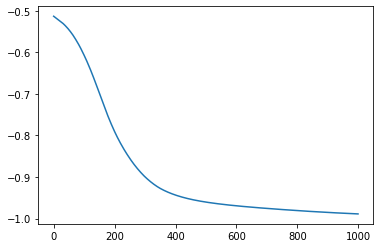

In [44]:
import matplotlib.pyplot as plt
plt.plot(all_loss)

#Considering the weight of edges

*   Using the **adjacency** matrix instead of edge-index.
*   Using the Networkx dataset labels. 
*   Using the node embedding.









In [45]:
!wget http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat

--2022-07-05 05:52:49--  http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/zachary.dat
Resolving vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)... 193.2.67.80
Connecting to vlado.fmf.uni-lj.si (vlado.fmf.uni-lj.si)|193.2.67.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4849 (4.7K) [text/plain]
Saving to: ‘zachary.dat’

zachary.dat         100%[===================>]   4.74K  18.3KB/s    in 0.3s    

2022-07-05 05:52:50 (18.3 KB/s) - ‘zachary.dat’ saved [4849/4849]



Note! the file contains two matrix, the first 34 rows belong to adj matrix with weightless edges. We should use the second 34 rows.

In [46]:
f=open('/content/zachary.dat','r')
adj=[]
for i in range(75):
  line=f.readline()
  if i>40:
    # print(line.split())
    row=[int(j) for j in line.split()]
    adj=adj+[row]
adj=np.array(adj)

In [47]:
adj

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [48]:
adj.shape

(34, 34)

In [49]:
G = nx.from_numpy_matrix(adj,create_using=nx.MultiGraph)


In [50]:
G=G.to_undirected()

In [51]:
from torch_geometric.utils import from_networkx

In [52]:
G_data_w=from_networkx(G)

In [53]:
G_data_w

Data(edge_index=[2, 156], weight=[156], num_nodes=34)

In [54]:
G_data_w.weight

tensor([4, 5, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 4, 6, 3, 4, 5, 1, 2, 2,
        2, 5, 6, 3, 4, 5, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 5, 3, 3,
        3, 2, 5, 3, 2, 4, 4, 3, 2, 5, 3, 3, 4, 1, 2, 2, 3, 3, 3, 1, 3, 3, 5, 3,
        3, 3, 3, 2, 3, 4, 3, 3, 2, 1, 1, 2, 2, 2, 1, 3, 1, 2, 2, 2, 3, 5, 4, 3,
        5, 4, 2, 3, 2, 5, 2, 7, 4, 2, 2, 4, 3, 4, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3,
        3, 2, 2, 7, 2, 4, 4, 2, 3, 3, 3, 1, 3, 2, 5, 4, 3, 4, 5, 4, 2, 3, 2, 4,
        2, 1, 1, 3, 4, 2, 4, 2, 2, 3, 4, 5])

In [55]:
edge_weight=G_data_w.weight

In [56]:
edge_weight=edge_weight.float()

In [57]:
edge_index=G_data_w.edge_index

In [58]:
embed = torch.nn.Embedding(34, 5)
X=embed.weight
X=X.requires_grad_(True)

In [59]:
y=[1 if i=='Officer' else 0 for i in G_data.club]

In [60]:
y=torch.tensor(y)

In [65]:
class model(Module):
  def __init__(self,inn_chan,hidden_chan,out_chan):
    super(model, self).__init__()
    self.GCN1=GCNConv(inn_chan,hidden_chan)
    self.GCN2=GCNConv(hidden_chan,out_chan)
    self.lin=torch.nn.Linear(out_chan,2)
  def forward(self,x,edge_index,edge_weight):
    h=self.GCN1(x,edge_index,edge_weight)
    h=torch.relu(h)
    h=self.GCN2(h,edge_index,edge_weight)
    h=torch.relu(h)
    h=self.lin(h)
    h=F.softmax(h,1)
    return h

In [66]:
karate_model=model(5,5,2)

In [67]:
from itertools import chain
optimizer=torch.optim.Adam(chain(karate_model.parameters(),embed.parameters()))

In [68]:

all_loss=[]
for epochs in range(1000):
  pred_label=karate_model(X,edge_index,edge_weight)
  loss=F.nll_loss(pred_label,y)
  pred_y=np.argmax(pred_label.detach().numpy(), axis=1)
  true_y=y.numpy()
  acc=accuracy_score(pred_y,true_y)
  optimizer.zero_grad()
  loss.backward()
  all_loss.append(loss.item())
  optimizer.step()
  if epochs%100==0:
    print(f'epochs={epochs} , loss={loss.item()} , accuracy={acc}')

epochs=0 , loss=-0.49995148181915283 , accuracy=0.5
epochs=100 , loss=-0.5614181756973267 , accuracy=0.9705882352941176
epochs=200 , loss=-0.7602657079696655 , accuracy=1.0
epochs=300 , loss=-0.8403760194778442 , accuracy=1.0
epochs=400 , loss=-0.875643253326416 , accuracy=1.0
epochs=500 , loss=-0.8989167213439941 , accuracy=1.0
epochs=600 , loss=-0.9165377616882324 , accuracy=1.0
epochs=700 , loss=-0.9306977391242981 , accuracy=1.0
epochs=800 , loss=-0.9417466521263123 , accuracy=1.0
epochs=900 , loss=-0.9502871036529541 , accuracy=1.0
